In [205]:
# !git clone "https://github.com/vee234o/Real_Estate_Market_Analysis"


In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df = pd.read_csv('/content/Real_Estate_Market_Analysis/data/Merged_dataset.csv')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13683 entries, 0 to 13682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          13681 non-null  object
 1   Location       13681 non-null  object
 2   Price          13683 non-null  object
 3   Bedrooms       13683 non-null  object
 4   Bathrooms      13516 non-null  object
 5   Toilets        12806 non-null  object
 6   Property Type  12863 non-null  object
 7   URL            13681 non-null  object
dtypes: object(8)
memory usage: 855.3+ KB


In [209]:
df.head()

,Title,Location,Price,Bedrooms,Bathrooms,Toilets,Property Type,URL
0,Fully Serviced 3-bedroom Apartment With Study ...,"Old Ikoyi, Ikoyi, Lagos","₦40,000,000 per annum",3,3,4,3 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
1,Top Rated Luxury 2 Bedroom Penthouse Apartment...,"Old Ikoyi Lagos, Ikoyi, Lagos","$40,000 per annum \napprox. ₦56,842,415",2,2,3,2 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
2,Luxury 3 Bedroom Apartment,"Ikoyi, Lagos","₦35,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
3,Luxury 3 Bedroom Apartment 4th Floor,"Banana Island, Ikoyi, Lagos","₦45,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
4,Well Maintained Luxury 4 Bedroom Apartment,"Buena Vista, Banana Island, Ikoyi, Lagos","₦55,000,000 per annum",4,4,5,4 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...


In [210]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
print(df.columns.tolist())

['title', 'location', 'price', 'bedrooms', 'bathrooms', 'toilets', 'property_type', 'url']


In [211]:
pd.set_option('display.max_rows', None)
print(df['property_type'].value_counts().head(10))

property_type
3 bedroom flat / apartment for rent                1891
5 Toilets                                          1792
2 bedroom flat / apartment for rent                1471
6 Toilets                                           828
4 bedroom terraced duplex for rent                  811
4 Toilets                                           673
3 Toilets                                           532
4 bedroom semi-detached duplex for rent             516
1 bedroom mini flat (room and parlour) for rent     457
5 bedroom detached duplex for rent                  413
Name: count, dtype: int64


In [212]:
def clean_property_type(text):
    if not isinstance(text, str):
        return "Other"

    text = text.lower()

    if 'toilet' in text or 'parking' in text or 'save' in text or 'sqm' in text:
        return "Unknown/Error"

    if 'land' in text:
        return 'Land'
    elif 'commercial' in text or 'office' in text or 'shop' in text or 'plaza' in text or 'hall' in text or 'warehouse' in text or 'hotel' in text or 'restaurant' in text:
        return 'Commercial'
    elif 'detached' in text or 'duplex' in text or 'terrace' in text or 'house' in text or 'bungalow' in text or 'townhouse' in text:
        return 'House/Duplex'
    elif 'flat' in text or 'apartment' in text or 'penthouse' in text:
        return 'Flat/Apartment'
    elif 'self contain' in text or 'studio' in text or 'mini flat' in text:
        return 'Studio/Mini Flat'
    else:
        return 'Other'

df['property_type'] = df['property_type'].apply(clean_property_type)

df_clean = df[df['property_type'] != 'Unknown/Error']

print(df_clean['property_type'].value_counts())

property_type
Flat/Apartment      4364
House/Duplex        3276
Other                830
Commercial           599
Studio/Mini Flat     287
Land                  67
Name: count, dtype: int64


In [213]:
df_clean.head()

,title,location,price,bedrooms,bathrooms,toilets,property_type,url
0,Fully Serviced 3-bedroom Apartment With Study ...,"Old Ikoyi, Ikoyi, Lagos","₦40,000,000 per annum",3,3,4,Flat/Apartment,https://nigeriapropertycentre.com/for-rent/fla...
1,Top Rated Luxury 2 Bedroom Penthouse Apartment...,"Old Ikoyi Lagos, Ikoyi, Lagos","$40,000 per annum \napprox. ₦56,842,415",2,2,3,Flat/Apartment,https://nigeriapropertycentre.com/for-rent/fla...
2,Luxury 3 Bedroom Apartment,"Ikoyi, Lagos","₦35,000,000 per annum",3,4,4,House/Duplex,https://nigeriapropertycentre.com/for-rent/hou...
3,Luxury 3 Bedroom Apartment 4th Floor,"Banana Island, Ikoyi, Lagos","₦45,000,000 per annum",3,4,4,House/Duplex,https://nigeriapropertycentre.com/for-rent/hou...
4,Well Maintained Luxury 4 Bedroom Apartment,"Buena Vista, Banana Island, Ikoyi, Lagos","₦55,000,000 per annum",4,4,5,Flat/Apartment,https://nigeriapropertycentre.com/for-rent/fla...


In [214]:
df_clean['price'].value_counts().head(10)

,count
price,
"₦15,000,000per annum",526
"₦20,000,000per annum",421
"₦25,000,000per annum",312
"₦12,000,000per annum",305
"₦40,000,000 per annum",278
"₦35,000,000 per annum",264
"₦10,000,000per annum",260
"₦50,000,000 per annum",258
"₦25,000,000 per annum",222


In [215]:
df['price'] = df['price'].astype(str).str.extract(r'(\d[\d,.]*)')[0]
df['price'] = df['price'].str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df = df.dropna(subset=['price']).copy()

df = df[df['price'] > 1000].copy()

df['price'] = df['price'].astype(int)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

print(df['price'].value_counts().head(10))

price
15000000    674
20000000    573
25000000    537
35000000    382
30000000    380
12000000    369
50000000    350
40000000    347
10000000    313
8000000     204
Name: count, dtype: int64


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7941 entries, 0 to 8602
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          7941 non-null   object
 1   location       7941 non-null   object
 2   price          7941 non-null   int64 
 3   bedrooms       7941 non-null   object
 4   bathrooms      7941 non-null   object
 5   toilets        7941 non-null   object
 6   property_type  7941 non-null   object
 7   url            7941 non-null   object
dtypes: int64(1), object(7)
memory usage: 558.4+ KB


In [217]:

sns.set_style("whitegrid")

df_for_plots = df.copy()

for col in ['bedrooms', 'toilets']:
    df_for_plots[col] = df_for_plots[col].astype(str).str.extract('(\\d+)', expand=False)
    df_for_plots[col] = pd.to_numeric(df_for_plots[col], errors='coerce')

# Drop rows where bedrooms or toilets could not be converted to a number
df_for_plots = df_for_plots.dropna(subset=['bedrooms', 'toilets']).copy()

df_for_plots['bedrooms'] = df_for_plots['bedrooms'].astype(int)
df_for_plots['toilets'] = df_for_plots['toilets'].astype(int)


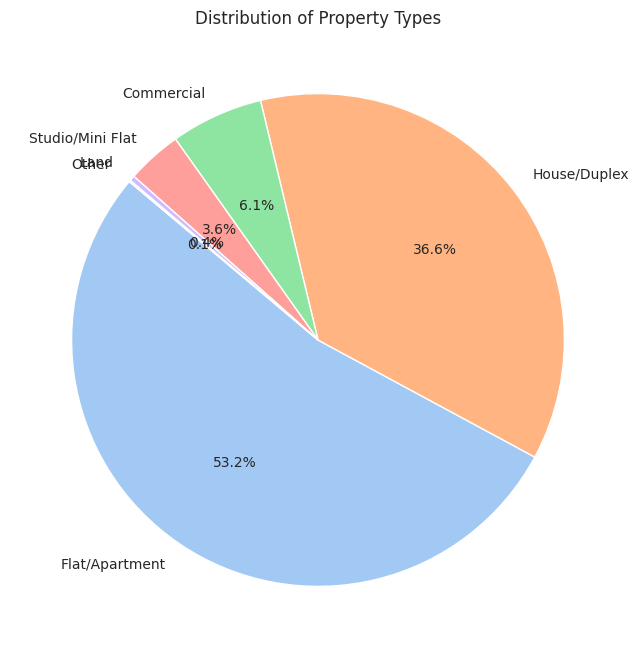

In [218]:
# This chart visualizes the percentage breakdown of property types to understand market supply
plt.figure(figsize=(10, 8))

type_counts = df_for_plots['property_type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Property Types')
plt.show()


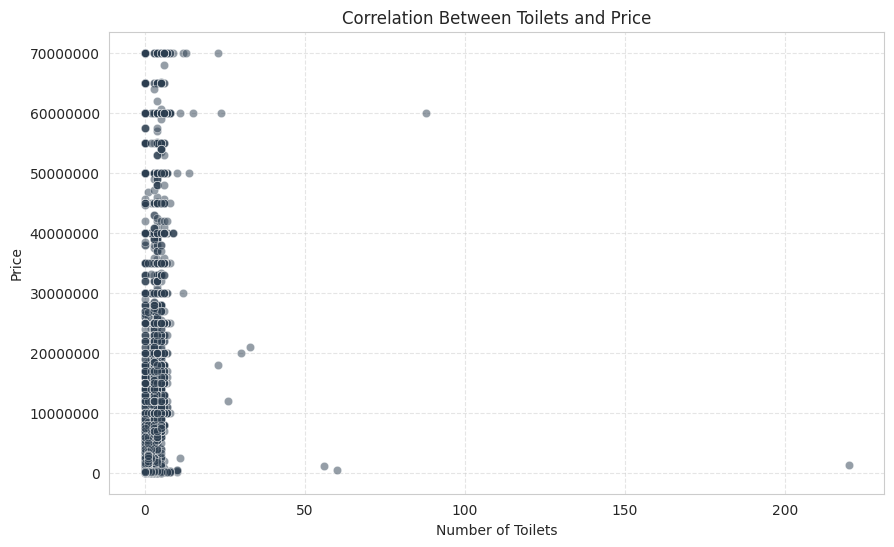

In [219]:
# This scatter plot analyzes the relationship between the number of toilets and price
# We filter out extreme price outliers to make the trend visible
chart_data = df_for_plots[(df_for_plots['price'] > 0) & (df_for_plots['price'] < 500000000)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=chart_data, x='toilets', y='price', alpha=0.5, color='#2c3e50')
plt.title('Correlation Between Toilets and Price')
plt.xlabel('Number of Toilets')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

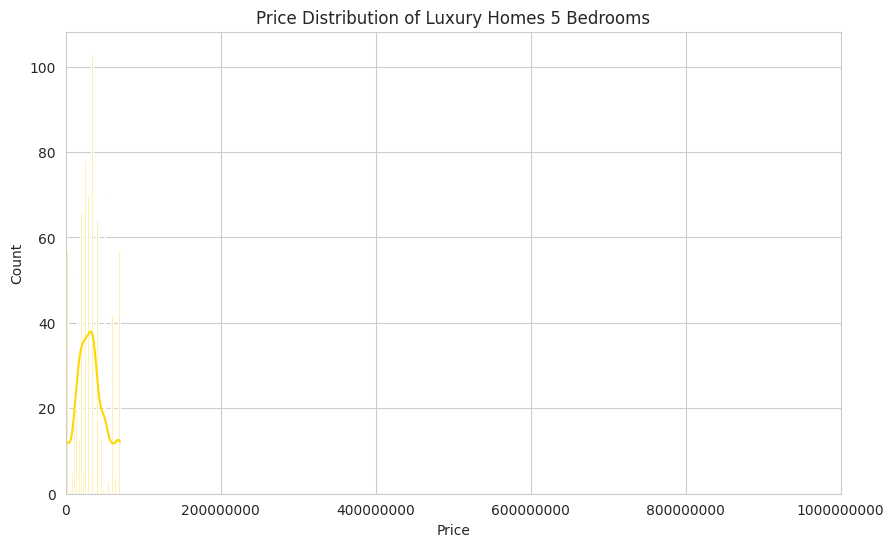

In [220]:

# This histogram shows the price distribution for homes with 5 or more bedrooms
# It helps identify the most common price point for the luxury segment
luxury_homes = df_for_plots[df_for_plots['bedrooms'] >= 5]

plt.figure(figsize=(10, 6))
sns.histplot(luxury_homes['price'], bins=30, kde=True, color='gold')
plt.title('Price Distribution of Luxury Homes 5 Bedrooms')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xlim(0, 1000000000) # Setting a reasonable x-axis limit for price
plt.ticklabel_format(style='plain', axis='x')
plt.show()